In [11]:
import os
import sys
import json
import codecs
import pickle
import warnings
import math
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")

In [12]:
import importlib
import DesignPoint
import HierarchyMiner
import HierarchiesQF
import pysubgroup as ps
import QualityComputer
import ScaleProbaComputer
import Snapshots
import SubgroupMiner
import Target
import TargetWRAcc
import Utils
import WRAccQF

In [13]:
from matplotlib import pyplot as plt 

In [14]:
dataDirectory = os.path.join(os.path.dirname(os.getcwd()), 'data/data-sv/')
metadata = pd.read_csv(dataDirectory + 'metadata-sv.csv', index_col = [0])

In [5]:
minerSD = pickle.load(open(dataDirectory + 'minerSD-sv', 'rb'))
dictSdNodesCorresp = {}
for i in range(len(minerSD[0].allSdNodes)) :
    dictSdNodesCorresp[minerSD[0].allSdNodes[i].node.id] = i
n_nodes = len(minerSD[0].allSdNodes)

## 1. SI with update

In [6]:
subgroupMiner = SubgroupMiner.SubgroupMiner(minerSD, dictSdNodesCorresp)

In [ ]:
%%time
nPatterns = 10
df_si_update = pd.DataFrame()
for cpt in range(nPatterns):
    print("|=========================================== pattern : " + str(cpt + 1) + " ===========================================|")
    qf = HierarchiesQF.HierarchiesQF(subgroupMiner, typeDL = 'uniform', alphaSg = 0.8, betaSelectors = 0.2, gammaDl = 1)
    target = Target.Target(subgroupMiner, typeDL = 'uniform', gammaDl = 1)
    task = ps.SubgroupDiscoveryTask(metadata, target, ps.create_selectors(metadata, ignore=['maxJVM']), result_set_size = 1, depth = 1, qf = qf)
    result = ps.BeamSearch(beam_width = 20).execute(task)
    res = result.to_dataframe(statistics_to_show=["indiceListSnapshots", "lenSubgroup", "patternIds", "patternNames"])
    df_si_update = df_si_update.append(res).reset_index(drop = True)
    indicesListMiners = [int(x) for x in res['indiceListSnapshots'].str.strip('[]').str.split(',')[0]]
    antichainIds = [int(x) for x in res['patternIds'].str.strip('[]').str.split(',')[0]]
    subgroupMiner.updateSdNodesValues(antichainIds, indicesListMiners)

|=========================================== pattern : 1 ===========================================|
|=========================================== pattern : 2 ===========================================|
|=========================================== pattern : 3 ===========================================|
|=========================================== pattern : 4 ===========================================|
|=========================================== pattern : 5 ===========================================|
|=========================================== pattern : 6 ===========================================|


In [128]:
df_si_update

,quality,subgroup,indiceListSnapshots,lenSubgroup,patternIds,patternNames
0,5.765662e+07,databaseVersion=='11.2.0.4.0',"[25, 26, 27, 28, 55, 56, 57, 58, 59, 60, 61, 6...",17.0,[20],['com.ibm.icu.math.BigDecimal']
1,2.917802e+00,databaseVersion=='11.2.0.4.0',"[25, 26, 27, 28, 55, 56, 57, 58, 59, 60, 61, 6...",17.0,"[1, 47]","['[B', 'fr.infologic.outils.persistance.IK']"
2,2.882506e+00,server=='QUUEGBJ6TJ5',"[66, 67, 68, 69]",4.0,[1],['[B']
3,2.642529e+00,server=='YRUSGBJ0H77',"[156, 157, 158]",3.0,[4],['[J']
4,2.622449e+00,server=='PAOKGB9XGEY',"[55, 56, 57, 58, 59, 60, 61, 62, 63, 64]",10.0,"[203, 162]","['fr.infologic.outils.persistance', 'java.sql']"
5,2.450672e+00,server=='FCWVGBUV',"[25, 26, 27, 28]",4.0,[203],['fr.infologic.outils.persistance']
6,1.893911e+00,#weeklyUsers: [97.0:110.0[,"[55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 75, 7...",85.0,[148],['fr.infologic.stocks.gestion.modele.LotContQu...
7,1.715954e+00,server=='FIJOGBZR',"[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4...",20.0,[3],['[I']
8,1.284082e+00,server=='DOFPGBN2',"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",24.0,[20],['com.ibm.icu.math.BigDecimal']
9,1.245560e+00,HibernateVersion=='5.2.17.Final-infologic-5',"[72, 73, 152, 153, 154, 155]",6.0,[20],['com.ibm.icu.math.BigDecimal']


## 2. SI sans update

In [ ]:
minerSDCopy = pickle.load(open(dataDirectory + 'minerSD-sv', 'rb'))
dictSdNodesCorresp = {}
for i in range(len(minerSDCopy[0].allSdNodes)) :
    dictSdNodesCorresp[minerSDCopy[0].allSdNodes[i].node.id] = i
subgroupMinerCopy = SubgroupMiner.SubgroupMiner(minerSDCopy, dictSdNodesCorresp)

In [ ]:
%%time
qf = HierarchiesQF.HierarchiesQF(subgroupMinerCopy, typeDL = 'uniform', alphaSg = 0.6, betaSelectors = 0.2, gammaDl = 1)
target = Target.Target(subgroupMinerCopy, typeDL = 'uniform', gammaDl = 1)
task = ps.SubgroupDiscoveryTask(metadata, target, ps.create_selectors(metadata, ignore=['maxJVM']), result_set_size = 20, depth = 1, qf = qf)
result = ps.BeamSearch(beam_width = 20).execute(task)
df_si = result.to_dataframe(statistics_to_show=["indiceListSnapshots", "lenSubgroup", "patternIds", "patternNames"])

In [15]:
df_si

,quality,subgroup,indiceListSnapshots,lenSubgroup,patternIds,patternNames
0,7.650591e+07,databaseVersion=='11.2.0.4.0',"[25, 26, 27, 28, 55, 56, 57, 58, 59, 60, 61, 6...",17.0,[20],['com.ibm.icu.math.BigDecimal']
1,7.650591e+07,Xms: [6291456000.0:6442450944.0[,"[25, 26, 27, 28, 55, 56, 57, 58, 59, 60, 61, 6...",17.0,[20],['com.ibm.icu.math.BigDecimal']
2,7.650591e+07,Xmx: [6291456000.0:6442450944.0[,"[25, 26, 27, 28, 55, 56, 57, 58, 59, 60, 61, 6...",17.0,[20],['com.ibm.icu.math.BigDecimal']
3,7.548970e+07,server=='PAOKGB9XGEY',"[55, 56, 57, 58, 59, 60, 61, 62, 63, 64]",10.0,[20],['com.ibm.icu.math.BigDecimal']
4,7.548970e+07,serverGroup=='QUXMGBUYK19',"[55, 56, 57, 58, 59, 60, 61, 62, 63, 64]",10.0,[20],['com.ibm.icu.math.BigDecimal']
5,7.548970e+07,softwareVersion=='V14_2_1',"[55, 56, 57, 58, 59, 60, 61, 62, 63, 64]",10.0,[20],['com.ibm.icu.math.BigDecimal']
6,7.200556e+07,server=='FCWVGBUV',"[25, 26, 27, 28]",4.0,[20],['com.ibm.icu.math.BigDecimal']
7,7.200556e+07,softwareVersion=='V14_3_1',"[25, 26, 27, 28]",4.0,[20],['com.ibm.icu.math.BigDecimal']
8,7.200556e+07,serverGroup=='LKDVGBZ7',"[25, 26, 27, 28]",4.0,[20],['com.ibm.icu.math.BigDecimal']
9,4.419421e+00,swap>=17179865088.0,"[53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 6...",13.0,[20],['com.ibm.icu.math.BigDecimal']


In [17]:
indexes_si = [0, 3, 6, 9, 10, 11, 13, 14, 16, 18]

## 3. Customized WRAcc

In [18]:
dict_nodes = {}
for i in range(n_nodes) :
    d_node = {}
    d_node['id'] = minerSD[0].allSdNodes[i].node.id
    d_node['name'] = minerSD[0].allSdNodes[i].node.name
    d_node['xBar'] = minerSD[0].allSdNodes[i].xBar
    listXhats = []
    for j in range(len(minerSD)) :
        listXhats.append(minerSD[j].allSdNodes[i].xHat)
    d_node['xHats'] = listXhats
    dict_nodes[i] = d_node

In [19]:
%%time
qf = WRAccQF.WRAccQF(dict_nodes, 4)
target = TargetWRAcc.TargetWRAcc(dict_nodes, 4)
task = ps.SubgroupDiscoveryTask(metadata, target, ps.create_selectors(metadata), result_set_size = 20, depth = 1, qf = qf)
result = ps.BeamSearch(beam_width = 20).execute(task)
df_wracc = result.to_dataframe(statistics_to_show=["indiceListSnapshots", "lenSubgroup", "patternIds", "patternNames"])   
df_wracc

CPU times: user 812 ms, sys: 2 µs, total: 812 ms
Wall time: 818 ms


,quality,subgroup,indiceListSnapshots,lenSubgroup,patternIds,patternNames
0,11089.397560,swap: [8589930496.0:12884897792.0[,"[75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 8...",75.0,"[288, 261, 148, 6]","['fr.infologic', 'fr.infologic.stocks', 'fr.in..."
1,11089.397560,server=='VANPGBOI',"[75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 8...",75.0,"[288, 261, 148, 6]","['fr.infologic', 'fr.infologic.stocks', 'fr.in..."
2,10833.344366,#weeklyUsers: [97.0:110.0[,"[55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 75, 7...",85.0,"[288, 261, 6, 148]","['fr.infologic', 'fr.infologic.stocks', '[Ljav..."
3,10832.063299,Xms: [4294967296.0:6291456000.0[,"[24, 49, 52, 53, 70, 74, 75, 76, 77, 78, 79, 8...",84.0,"[288, 261, 6, 148]","['fr.infologic', 'fr.infologic.stocks', '[Ljav..."
4,10832.063299,Xmx: [4294967296.0:6291456000.0[,"[24, 49, 52, 53, 70, 74, 75, 76, 77, 78, 79, 8...",84.0,"[288, 261, 6, 148]","['fr.infologic', 'fr.infologic.stocks', '[Ljav..."
5,10525.851661,softwareVersion=='V15_2L',"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",101.0,"[288, 261, 6, 148]","['fr.infologic', 'fr.infologic.stocks', '[Ljav..."
6,9869.958333,isWeekEndDay==False,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",144.0,"[288, 6, 261, 148]","['fr.infologic', '[Ljava.lang.Object;', 'fr.in..."
7,9758.632365,HibernateVersion=='5.2.17.Final-infologic-10',"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",152.0,"[288, 6, 261, 1]","['fr.infologic', '[Ljava.lang.Object;', 'fr.in..."
8,9721.446398,serverGroup=='FFCNGB1A',"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",135.0,"[288, 6, 261, 148]","['fr.infologic', '[Ljava.lang.Object;', 'fr.in..."
9,9688.592265,softwareType=='Factory',"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",159.0,"[288, 6, 261, 1]","['fr.infologic', '[Ljava.lang.Object;', 'fr.in..."


In [20]:
indexes_wracc = [0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 14, 17, 18]

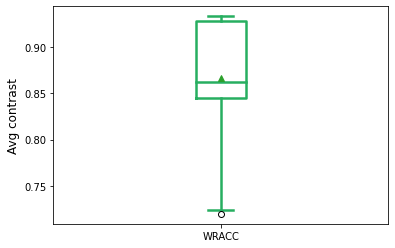

In [21]:
Utils.plotOneContrastMeasure(df_wracc, np.arange(20), minerSD, 'WRACC') 

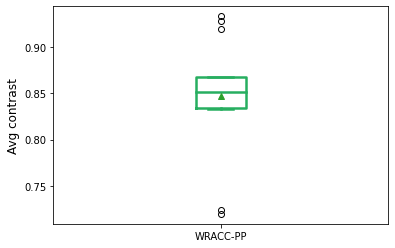

In [22]:
Utils.plotOneContrastMeasure(df_wracc, indexes_wracc, minerSD, 'WRACC-PP') 

In [ ]:
def redundVersion2(df, indRows, minerSD):
    factor = 0
    for i in np.arange(len(indRows))[1:] :
        tmp = []
        for j in range(0, i) :
            row1 = df.iloc[indRows[i]]
            row2 = df.iloc[indRows[j]]
            
            row1IndicesListSnapshots = [int(x) for x in row1['indiceListSnapshots'].strip('[]').split(',')]
            row1PatternIds = [int(x) for x in row1['patternIds'].strip('[]').split(',')]

            row2IndicesListSnapshots = [int(x) for x in row2['indiceListSnapshots'].strip('[]').split(',')]
            row2PatternIds = [int(x) for x in row2['patternIds'].strip('[]').split(',')]

            factor1 = Utils.jaccard(row1IndicesListSnapshots, row2IndicesListSnapshots)
            if factor1 == 0 :
                tmp.append(0)
            else :
                factor2 = 0
                for p1 in row1PatternIds :
                    best_match = []
                    for p2 in row2PatternIds :
                        if p1 == p2 :
                            best_match.append(1)
                        else :
                            best_match.append(Utils.isParentOrChild (p1, p2, minerSD))
                    factor2 += max(best_match)    
                factor2 = factor2 / len(set(row1PatternIds).union(set(row2PatternIds)))
                tmp.append(factor1 * factor2)
        factor += max(tmp)
    if len(indRows) == 1 :
        return 0
    else :
        return factor / (len(indRows)-1) 

In [ ]:
redundVersion2(df_wracc, np.arange(20), minerSD)

In [ ]:
redundVersion2(df_wracc, indexes_wracc, minerSD)

## 4. KL-DIV

In [23]:
import KLDQF
import TargetKLD

### 4.1 Only for leaves

In [24]:
total_size = 0
for i in range(n_nodes):
    if len(minerSD[0].allSdNodes[i].node.allDesc) == 0 :
        total_size += minerSD[0].allSdNodes[i].xBar

In [25]:
n_nodes = len(minerSD[0].allSdNodes)
dict_nodes_probas = {}
cpt = 0
for i in range(n_nodes) :
    if len(minerSD[0].allSdNodes[i].node.allDesc) == 0 :
        d_node_proba = {}
        d_node_proba['id'] = minerSD[0].allSdNodes[i].node.id
        d_node_proba['name'] = minerSD[0].allSdNodes[i].node.name
        observedProbas = []
        for j in range(len(minerSD)) :
            a = minerSD[j].allSdNodes[i].xHat / total_size
            b = minerSD[0].allSdNodes[i].xBar / total_size
            observedProbas.append(a * math.log(a / b))
        d_node_proba['mutual_info'] = observedProbas
        dict_nodes_probas[cpt] = d_node_proba
        cpt += 1

In [26]:
%%time
qf = KLDQF.KLDQF(dict_nodes_probas, 4)
target = TargetKLD.TargetKLD(dict_nodes_probas, 4)
task = ps.SubgroupDiscoveryTask(metadata, target, ps.create_selectors(metadata), result_set_size = 20, depth = 1, qf = qf)
result = ps.BeamSearch(beam_width = 20).execute(task)
df_kld = result.to_dataframe(statistics_to_show=["indiceListSnapshots", "lenSubgroup", "patternIds", "patternNames"])   
df_kld

CPU times: user 636 ms, sys: 991 µs, total: 637 ms
Wall time: 641 ms


,quality,subgroup,indiceListSnapshots,lenSubgroup,patternIds,patternNames
0,2.708554,server=='FCWVGBUV',"[25, 26, 27, 28]",4.0,"[20, 1, 47, 143]","['com.ibm.icu.math.BigDecimal', '[B', 'fr.info..."
1,2.708554,softwareVersion=='V14_3_1',"[25, 26, 27, 28]",4.0,"[20, 1, 47, 143]","['com.ibm.icu.math.BigDecimal', '[B', 'fr.info..."
2,2.708554,serverGroup=='LKDVGBZ7',"[25, 26, 27, 28]",4.0,"[20, 1, 47, 143]","['com.ibm.icu.math.BigDecimal', '[B', 'fr.info..."
3,2.522781,server=='PAOKGB9XGEY',"[55, 56, 57, 58, 59, 60, 61, 62, 63, 64]",10.0,"[20, 1, 47, 143]","['com.ibm.icu.math.BigDecimal', '[B', 'fr.info..."
4,2.522781,serverGroup=='QUXMGBUYK19',"[55, 56, 57, 58, 59, 60, 61, 62, 63, 64]",10.0,"[20, 1, 47, 143]","['com.ibm.icu.math.BigDecimal', '[B', 'fr.info..."
5,2.522781,softwareVersion=='V14_2_1',"[55, 56, 57, 58, 59, 60, 61, 62, 63, 64]",10.0,"[20, 1, 47, 143]","['com.ibm.icu.math.BigDecimal', '[B', 'fr.info..."
6,2.233382,Xms: [6291456000.0:6442450944.0[,"[25, 26, 27, 28, 55, 56, 57, 58, 59, 60, 61, 6...",17.0,"[20, 1, 47, 4]","['com.ibm.icu.math.BigDecimal', '[B', 'fr.info..."
7,2.233382,Xmx: [6291456000.0:6442450944.0[,"[25, 26, 27, 28, 55, 56, 57, 58, 59, 60, 61, 6...",17.0,"[20, 1, 47, 4]","['com.ibm.icu.math.BigDecimal', '[B', 'fr.info..."
8,2.190985,databaseVersion=='11.2.0.4.0',"[25, 26, 27, 28, 55, 56, 57, 58, 59, 60, 61, 6...",17.0,"[20, 1, 47, 4]","['com.ibm.icu.math.BigDecimal', '[B', 'fr.info..."
9,2.013990,swap>=17179865088.0,"[53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 6...",13.0,"[20, 1, 47, 4]","['com.ibm.icu.math.BigDecimal', '[B', 'fr.info..."


In [27]:
indexes_kld = [0, 3, 6, 9, 10, 12, 13, 14, 15, 16, 17, 19]

In [ ]:
Utils.plotOneContrastMeasure(df_kld, np.arange(20), minerSD, 'KLD') 

In [ ]:
Utils.plotOneContrastMeasure(df_kld, indexes_kld, minerSD, 'KLD') 

In [ ]:
redundVersion2(df_kld, np.arange(20), minerSD)

In [ ]:
redundVersion2(df_kld, indexes_kld, minerSD)

## 5. Putting all together

In [124]:
importlib.reload(Utils)

<module 'Utils' from '/home/yre/notebooks-ia/sd-antichains-paper/subgroup-miner/Utils.py'>

### 5.1 Contrast

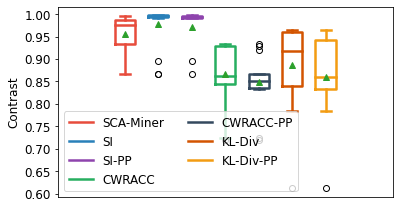

In [127]:
Utils.plotAllContrastMeasure([df_si_update, df_si, df_si, df_wracc, df_wracc, df_kld, df_kld], [np.arange(10), np.arange(20), indexes_si, np.arange(20), indexes_wracc, np.arange(20), indexes_kld], minerSD)

### 5.2 Redund

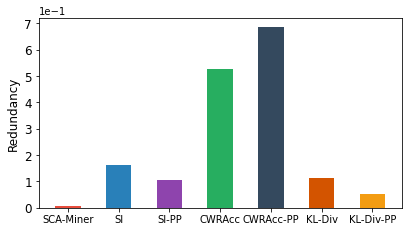

In [29]:
Utils.plotAllRedundV1([df_si_update, df_si, df_si, df_wracc, df_wracc, df_kld, df_kld], [np.arange(10), np.arange(20), indexes_si, np.arange(20), indexes_wracc, np.arange(20), indexes_kld], minerSD)

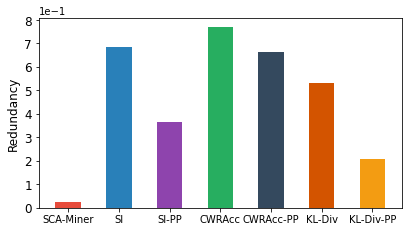

In [126]:
Utils.plotAllRedundV2([df_si_update, df_si, df_si, df_wracc, df_wracc, df_kld, df_kld], [np.arange(10), np.arange(20), indexes_si, np.arange(20), indexes_wracc, np.arange(20), indexes_kld], minerSD)